<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Machine Learning - Dr. Hamid Beigy
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 
            	<br/>
			</font>
</br>

Complete the Todo parts and just run the other cells. Do not add any additional cell to the notebook. 

# Feature Extraction with Different Methods

In [18]:
# Import libraries
import pandas as pd # To handle the data set.
import seaborn as sb # To display visualizations.
import matplotlib.pyplot as plt # To plot
import numpy as np

from sklearn.model_selection import train_test_split # To split data
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selection with Cross Validation
from sklearn.decomposition import PCA # To apply PCA
from sklearn import preprocessing # To get MinMax Scaler function

# To plot inline
%matplotlib inline

## Loading and Preparing DataSet

In [19]:
# Loading file and dropping some columns 
australia = pd.read_csv('weatherAUS.csv') 
australia = australia.drop(['Location','Date','Evaporation','Sunshine', 'Cloud9am','Cloud3pm',
                           'WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                           'WindSpeed3pm'], axis=1)

In [20]:
# Splitting between X and Y vector wich means the corpus and target vector respectively
Y = australia.RainTomorrow
X = australia.drop(['RainTomorrow'], axis=1)

In [29]:
''' Todo: Switch 'Yes' and 'No' with a boolen value and handle NaN values by replacing it with a zero '''

Y = Y.replace({'Yes': 1, 'No': 0})
X = X.replace({'Yes': 1, 'No': 0})

Y = Y.fillna(0).astype('int')
X = X.fillna(0)

## Scaling Data

Working with values in a wide range is not convenient, we need to scale it. In this case we are going to normalize it and scaling it in a 0-1 range.

In [37]:
''' Todo: Scaling dataset keeping the columns name (Hint: use MinMaxScaler function).
    Name the scaled datafarame to X_scaled'''

scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

X_scaled

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.348718,0.339844,0.000000,0.65,0.47,0.982805,0.983263,0.344037,0.359375,0.0,0.000000
1,0.246154,0.343750,0.001078,0.99,0.46,0.962056,0.964217,0.165138,0.367188,0.0,0.000000
2,0.723077,0.572266,0.000000,0.48,0.50,0.980692,0.982974,0.655963,0.576172,0.0,0.000544
3,0.643590,0.607422,0.000000,0.50,0.41,0.978194,0.976241,0.594037,0.609375,0.0,0.000000
4,0.592308,0.554688,0.000000,0.64,0.67,0.980115,0.976337,0.644495,0.541016,0.0,0.001088
...,...,...,...,...,...,...,...,...,...,...,...
36876,0.476923,0.337891,0.019946,0.84,0.81,0.976177,0.975856,0.373853,0.371094,1.0,0.024483
36877,0.379487,0.568359,0.000000,0.38,0.45,0.983862,0.982589,0.557339,0.558594,0.0,0.000000
36878,0.743590,0.679688,0.000000,0.54,0.39,0.972719,0.970566,0.724771,0.695312,0.0,0.000000
36879,0.379487,0.515625,0.000000,0.50,0.41,0.983573,0.981050,0.511468,0.507812,0.0,0.000000


## Splitting up Data

In [38]:
# Splitting  up data, seting 75% for train and 25% for test. (you can change this setup)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=43)

# 1) Univariate Feature Selection

This method works by selection the K best features according to a score. The K number of features is setting explicity.

([<matplotlib.axis.XTick at 0x23ac36a1dc8>,
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'Humidity9am'),
  Text(4, 0, 'Humidity3pm'),
  Text(5, 0, 'Pressure9am'),
  Text(6, 0, 'Pressure3pm'),
  Text(7, 0, 'Temp9am'),
  Text(8, 0, 'Temp3pm'),
  Text(9, 0, 'RainToday'),
  Text(10, 0, 'RISK_MM')])

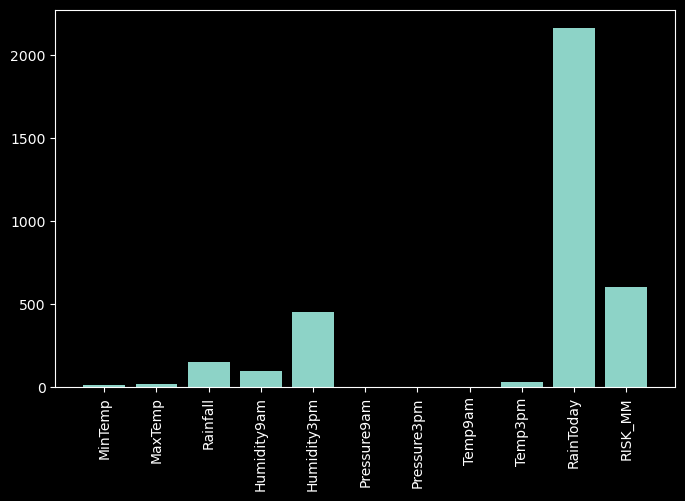

In [153]:
''' Todo: Initialize SelectKBest function and create a dict to 
    visualize which features were selected with the highest score'''

plt.style.use(['dark_background'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')

K = 5
UnivariateFeatureSelection = SelectKBest(chi2, k=K).fit(x_train, y_train)
scores = UnivariateFeatureSelection.scores_
dict_scores = {column:scores[i] for i, column in enumerate(x_train.columns)}

x_axis = np.arange(len(dict_scores))
plt.bar(x_axis, dict_scores.values())
plt.xticks(x_axis, dict_scores.keys(), rotation=90)


In [107]:
''' Todo: Print the top 5 best features '''

top_k_features = sorted(dict_scores, key=lambda x: dict_scores[x])[::-1][:K]
top_k_features


['RainToday', 'RISK_MM', 'Humidity3pm', 'Rainfall', 'Humidity9am']

## Extracting the best K values

Now that we have the best features, let's extract them from the original data set and let's measure the performance with the random forest algorithm.

In [108]:
# Using the 'UnivariateFeatureSelection' based on 'SelectKBest' function,
# let's extract the best features from the original dataset

x_train_k_best = UnivariateFeatureSelection.transform(x_train)
x_test_k_best = UnivariateFeatureSelection.transform(x_test)

In [109]:
print("Shape of original data: ", x_train.shape)
print("Shape of corpus with best features: ", x_train_k_best.shape)

Shape of original data:  (27660, 11)
Shape of corpus with best features:  (27660, 5)


## Testing with Random Forest Algorithm

In [159]:
''' Todo: Initialize and fit data to the random forest classifier'''

tree_num = 10
rfc = RandomForestClassifier(n_estimators=tree_num)
rfc.fit(x_train_k_best, y_train)

RandomForestClassifier(n_estimators=10)

In [160]:
''' Todo: Make a prediction and calculting the accuracy'''

y_pred = rfc.predict(x_test_k_best)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data:', acc)

Accuracy on test data: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

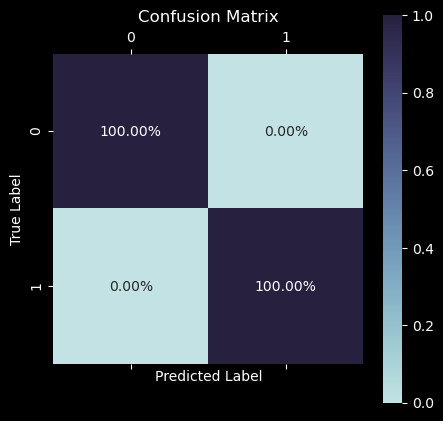

In [161]:
''' Todo: Show performance with a confusion matrix'''

mat = confusion_matrix(y_test, y_pred)
mat = mat/np.max(mat, axis=1)

cmap = sb.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
mat_plot = plt.matshow(mat, cmap='hot')
plt.rc('figure', figsize=(8, 5), dpi=100)
sb.heatmap(mat, annot=True, cmap=cmap, fmt='.2%')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


# 2) Recursive Feature Elimination

In [154]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier() 
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=5, step=1)
# Fit the origial dataset
rfe = rfe.fit(x_train, y_train)

In [155]:
print("Best features chosen by RFE: \n")
for i in x_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

Rainfall
Humidity9am
Humidity3pm
RainToday
RISK_MM


## Testing with Random Forest Algorithm

In [156]:
# Generating x_train and x_test based on the best features given by RFE
x_train_RFE = rfe.transform(x_train)
x_test_RFE = rfe.transform(x_test)

In [158]:
''' Todo: Fit the Random Forest'''

tree_num = 10
rfc = RandomForestClassifier(n_estimators=tree_num)
rfc.fit(x_train_k_best, y_train)

RandomForestClassifier(n_estimators=10)

In [162]:
''' Todo: Make a prediction and calculate the accuracy'''

y_pred = rfc.predict(x_test_k_best)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data:', acc)


Accuracy on test data: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

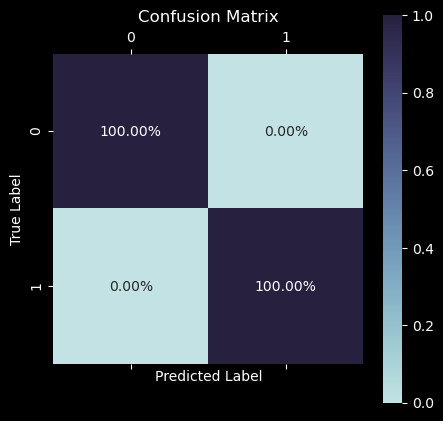

In [163]:
''' Todo: Show performance with a confusion matrix'''

mat = confusion_matrix(y_test, y_pred)
mat = mat/np.max(mat, axis=1)

cmap = sb.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
mat_plot = plt.matshow(mat, cmap='hot')
plt.rc('figure', figsize=(8, 5), dpi=100)
sb.heatmap(mat, annot=True, cmap=cmap, fmt='.2%')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


# 3) Recursive Feature Elimination with Cross-Validation

This method is an extention of Recursive Feature Elimination showed above. In this method we have to set the number of k-fold cross validation, basically takes the subset of the traing set and measure the performance recurively with respect to the number of features.

In [ ]:
# Initialize the Random Forest Classifier
RandForest_RFECV = RandomForestClassifier() 
''' Todo: Initialize the RFECV function setting 3-fold cross validation'''

''' Todo: Fit data'''


''' Todo: print best features'''


In [ ]:
''' Todo: Plot the best features with respect to the Cross Validation Score'''



# 4) Tree based Feature Selection

This method is to compute the relevance of each feature in the dataset.


In [27]:
# Initialize the Random Forest Classifier
RandForest_Tree = RandomForestClassifier()  
# Fit the random forest with the original data
RandForest_Tree = RandForest_Tree.fit(x_train, y_train)
# Getting the relevance between features
relevants = RandForest_Tree.feature_importances_

In [28]:
# Apply the tree based on importance for the random forest classifier and indexing it
std = np.std([tree.feature_importances_ for tree in RandForest_Tree.estimators_], axis=0)
indices = np.argsort(relevants)[::-1]

In [ ]:
''' Todo: Print the ranking of importance of each feature'''



In [ ]:
''' Todo: Plot the feature importances'''



# 5) Feature Extraction through PCA

In some cases it is convenient to apply dimensionality reduction to visualize the number of components or elements which could be the best for our model. In this case we apply PCA to discover which ones are the features to obtain a acceptable performance in the model.

In [ ]:
# Initializing PCA and fitting
pca = PCA()
pca.fit(x_train)

In [ ]:
''' Plot the Variance Ratio(y label) and Number of Features(x label)'''

